In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import sklearn as sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

import graphviz 
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb
from xgboost import plot_importance, XGBClassifier, plot_tree
from sklearn.decomposition import PCA

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score 
from sklearn import preprocessing
from sklearn.utils import class_weight

In [4]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

In [5]:
#data_set = r"C:\Users\A\Desktop\neural networks\WESAD-data\S2"
path = r"C:\Users\kssin\Downloads\WESAD\S16\S16.pkl"
#s2_path = data_set + 'S2/S2.pkl'

with open(path, 'rb') as file:
    data = pickle.load(file, encoding='latin1')

In [6]:
c_ax=data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=data['label']

print("Done")

Done


In [7]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")

data frame combined


In [8]:
display(df.shape)
display(df.info)
display(df.describe)

(3941700, 9)

<bound method DataFrame.info of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.7160  0.0856  1.6184  0.052780 -0.037445  0.963211  33.405396   
1        0.6076  0.0392  1.5192  0.018539  0.006821  0.946426  33.428040   
2        0.5252 -0.0142  1.3152 -0.037125  0.029068  0.980377  33.408447   
3        0.4800 -0.0718  1.0126 -0.082260  0.002884  0.954437  33.420502   
4        0.4638 -0.1342  0.6410 -0.101624 -0.014603  0.947571  33.414459   
...         ...     ...     ...       ...       ...       ...        ...   
3941695  0.9088 -0.0206 -0.1426 -0.045319 -0.026276  2.178955  34.260315   
3941696  0.9078 -0.0212 -0.1480 -0.040878 -0.018997  2.083969  34.289337   
3941697  0.9082 -0.0210 -0.1454 -0.042618 -0.012772  2.075958  34.319916   
3941698  0.9074 -0.0194 -0.1454 -0.035706 -0.003525  2.070618  34.316895   
3941699  0.9048 -0.0194 -0.1454 -0.028107  0.010757  2.069855  34.330627   

           c_resp  w_label  
0       -1.383972      0.0

<bound method NDFrame.describe of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.7160  0.0856  1.6184  0.052780 -0.037445  0.963211  33.405396   
1        0.6076  0.0392  1.5192  0.018539  0.006821  0.946426  33.428040   
2        0.5252 -0.0142  1.3152 -0.037125  0.029068  0.980377  33.408447   
3        0.4800 -0.0718  1.0126 -0.082260  0.002884  0.954437  33.420502   
4        0.4638 -0.1342  0.6410 -0.101624 -0.014603  0.947571  33.414459   
...         ...     ...     ...       ...       ...       ...        ...   
3941695  0.9088 -0.0206 -0.1426 -0.045319 -0.026276  2.178955  34.260315   
3941696  0.9078 -0.0212 -0.1480 -0.040878 -0.018997  2.083969  34.289337   
3941697  0.9082 -0.0210 -0.1454 -0.042618 -0.012772  2.075958  34.319916   
3941698  0.9074 -0.0194 -0.1454 -0.035706 -0.003525  2.070618  34.316895   
3941699  0.9048 -0.0194 -0.1454 -0.028107  0.010757  2.069855  34.330627   

           c_resp  w_label  
0       -1.383972      0

## Concatenate classes 0, 1, 2, 3, and 4
Classes 5, 6 and 7 correspond to timed periods in which the participant answered questionnaires, therefore, only classes 0, 1, 2, 3, and 4 will be used. Additionally, the significant imbalance has been eliminated¶

In [9]:
loc0 = df.loc[df['w_label'] == 0]
loc1 = df.loc[df['w_label'] == 1]
loc2 = df.loc[df['w_label'] == 2]
loc3 = df.loc[df['w_label'] == 3]
loc4 = df.loc[df['w_label'] == 4]

In [10]:
c_loc = pd.concat([loc0, loc1, loc2, loc3, loc4])
c_loc

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.7160,0.0856,1.6184,0.052780,-0.037445,0.963211,33.405396,-1.383972,0.0
1,0.6076,0.0392,1.5192,0.018539,0.006821,0.946426,33.428040,-1.397705,0.0
2,0.5252,-0.0142,1.3152,-0.037125,0.029068,0.980377,33.408447,-1.411438,0.0
3,0.4800,-0.0718,1.0126,-0.082260,0.002884,0.954437,33.420502,-1.417542,0.0
4,0.4638,-0.1342,0.6410,-0.101624,-0.014603,0.947571,33.414459,-1.422119,0.0
...,...,...,...,...,...,...,...,...,...
3787954,0.8594,-0.0386,-0.3554,0.035751,0.011215,1.736069,34.414764,-0.270081,4.0
3787955,0.8574,-0.0374,-0.3498,0.039368,0.002747,1.726532,34.393311,-0.251770,4.0
3787956,0.8568,-0.0370,-0.3490,0.043442,-0.003067,1.725769,34.399475,-0.254822,4.0
3787957,0.8578,-0.0390,-0.3522,0.047836,0.006409,1.730347,34.399475,-0.267029,4.0


In [11]:
c_loc.describe().T

,count,mean,std,min,25%,50%,75%,max
c_ax,3826200.0,0.894964,0.029295,0.292600,0.885800,0.904200,0.913800,1.352200
c_ay,3826200.0,-0.027602,0.048911,-0.470000,-0.056600,-0.030200,0.001200,0.403800
c_az,3826200.0,-0.127123,0.161596,-3.432800,-0.214400,-0.134200,-0.011800,2.356200
c_ecg,3826200.0,0.000444,0.355511,-1.401169,-0.142227,-0.046555,0.028793,1.499954
c_emg,3826200.0,-0.002816,0.011419,-0.220047,-0.009750,-0.002563,0.004349,0.183060
c_eda,3826200.0,2.137410,1.113151,0.637436,1.152039,1.974487,2.296448,5.500412
c_temp,3826200.0,34.096258,0.254667,33.281677,33.920502,34.068115,34.324493,34.716980
c_resp,3826200.0,0.047877,3.448199,-25.285339,-2.149963,-0.215149,2.388000,15.924072
w_label,3826200.0,1.243688,1.444256,0.000000,0.000000,1.000000,2.000000,4.000000


#### Plot all classes vs. classes 0,1,2,3,4

3941700 3826200
Number of Rows Removed: 115500


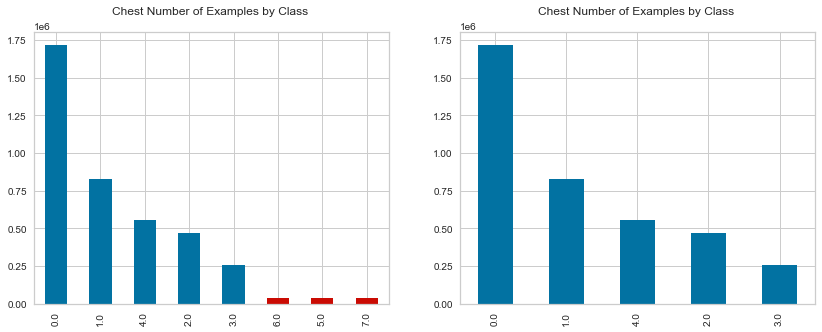

In [12]:
plt.figure(figsize = (14,5))
plt.subplot(1, 2, 1)
df['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n',
                                     color=['b','b','b','b','b','r','r','r'])
plt.subplot(1, 2, 2)
c_loc['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n')
print((df['w_label'].value_counts().sum()), c_loc['w_label'].value_counts().sum())
print('Number of Rows Removed:', (df['w_label'].value_counts().sum()) - 
      c_loc['w_label'].value_counts().sum());

# Calculating the interquartile range

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )

IQR is
 c_ax       0.026600
c_ay       0.057600
c_az       0.201200
c_ecg      0.169556
c_emg      0.014053
c_eda      1.145554
c_temp     0.399445
c_resp     4.496765
w_label    2.000000
dtype: float64


In [14]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2609393, 9)


In [15]:
#mean normalization 
norm_df_out=(df_out-df_out.mean())/df_out.std()
#min-max normalization:
#norm_df_out=(df_out-df_out.min())/(df_out.max()-df_out.min())

norm_y = df_out.w_label #keep original labels Dont normalize labels
norm_x = norm_df_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [16]:
norm_df_out.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
27,1.746846,1.395111,-0.683393,1.260605,-2.186626,-1.151133,-2.634397,-0.554159,-0.804902
51,1.368761,-1.441374,0.503065,0.237084,2.249138,-1.141169,-2.523829,-0.695345,-0.804902
52,0.682233,-1.560388,0.471760,-0.008618,2.628958,-1.155852,-2.483013,-0.631451,-0.804902
53,-0.173438,-1.580224,0.415411,-0.255027,2.425483,-1.157949,-2.541120,-0.623206,-0.804902
54,-0.800264,-1.609977,0.371584,-0.338934,0.860983,-1.077720,-2.605226,-0.629390,-0.804902


In [17]:
norm_df_out.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,2.609393e+06,2.609393e+06,2.609393e+06,2.609393e+06,2.609393e+06,2.609393e+06,2.609393e+06,2.609393e+06,2.609393e+06
mean,4.310623e-13,-9.697480e-14,-1.096255e-14,8.470117e-16,3.008969e-15,2.429502e-14,-4.345294e-12,3.863909e-17,-3.734567e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.650907e+00,-2.943920e+00,-2.805869e+00,-2.557330e+00,-2.783487e+00,-1.543365e+00,-2.861061e+00,-3.000694e+00,-8.049025e-01
25%,-3.525321e-01,-7.372117e-01,-6.395658e-01,-5.258656e-01,-6.582995e-01,-1.096598e+00,-6.787582e-01,-7.190477e-01,-8.049025e-01
50%,2.941967e-01,-1.421450e-01,-2.285834e-02,9.936377e-02,2.447344e-02,1.372572e-01,-2.508372e-01,-1.306015e-01,-1.028466e-01
75%,6.822329e-01,7.504543e-01,9.068994e-01,5.298728e-01,6.801164e-01,5.085149e-01,9.603510e-01,7.402163e-01,5.992093e-01
max,2.632371e+00,2.758808e+00,3.245379e+00,2.688082e+00,2.764609e+00,3.087392e+00,2.170716e+00,3.072359e+00,2.705377e+00


In [18]:
norm_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2609393 entries, 27 to 3941699
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 199.1 MB


In [19]:
norm_df_out.shape

(2609393, 9)

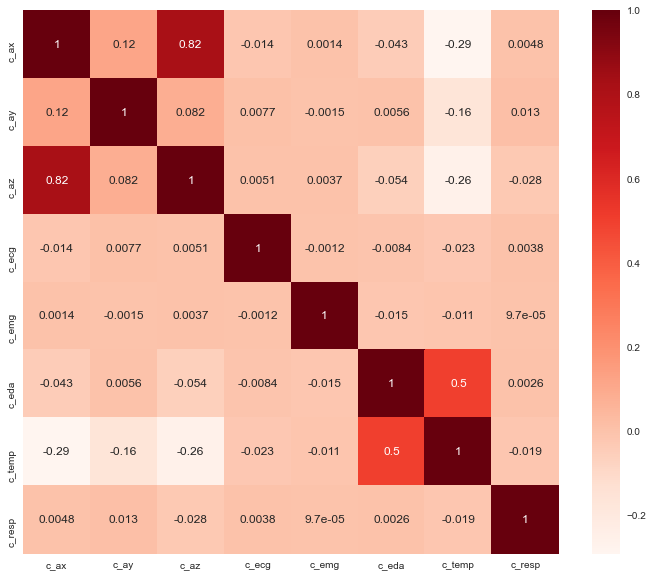

In [20]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = norm_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.000000e+00
c_ax      0.000000e+00
c_ay      0.000000e+00
c_az      0.000000e+00
c_ecg     9.911082e-81
c_emg     3.223656e-06
c_eda     0.000000e+00
c_temp    0.000000e+00
c_resp    0.000000e+00
dtype: float64

In [22]:
norm_x_train

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
2138254,-0.034143,1.216591,-0.548782,-0.703592,0.770550,2.060141,-0.268363,0.228031
2289306,0.632488,-0.519021,1.651957,-1.527082,0.422381,0.974160,-0.848492,-0.580953
680066,0.950877,-1.193430,1.409344,0.265761,-0.445781,-1.143791,-0.543842,-1.121479
2933400,1.030470,-1.500882,1.063424,0.648121,1.087067,0.032907,0.948471,0.397042
750671,0.552889,2.248040,1.345168,-2.003262,0.205340,-1.137499,-0.731454,-0.381026
...,...,...,...,...,...,...,...,...
3025275,-0.004295,0.403332,-0.439214,-0.166872,-0.029787,0.330752,0.777679,-0.746357
2313313,0.672282,-0.528939,0.956987,1.128903,0.142037,0.772800,-0.555722,1.424504
1013618,1.070269,-1.019870,1.162035,0.170171,-1.924369,-0.616270,-0.702166,-1.166308
3105648,-0.143590,0.140511,-0.689654,-0.358052,0.689160,0.519002,1.361218,0.124976


In [23]:
norm_y_train

2138254    0.0
2289306    0.0
680066     1.0
2933400    0.0
750671     1.0
          ... 
3025275    3.0
2313313    0.0
1013618    0.0
3105648    3.0
27365      0.0
Name: w_label, Length: 2087514, dtype: float64

In [24]:
norm_x_test

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
2464265,0.572786,-0.380173,0.869333,0.341525,-0.459346,0.238986,-0.297770,-0.379996
2445554,0.871278,-0.350419,1.154208,1.639425,0.458554,0.288802,-0.286007,0.803595
2682082,-2.392214,-1.074418,-1.743066,0.417289,0.173689,0.189695,0.813084,-0.382057
2753932,-1.994227,-0.910774,-1.716457,0.057587,1.729145,0.111038,0.936591,0.363034
534151,0.254397,0.770290,-0.104251,-0.010388,-0.730646,-1.108658,-0.737218,0.997339
...,...,...,...,...,...,...,...,...
1113389,1.319010,-0.697541,1.016467,0.378345,0.567074,-0.854336,-0.327058,-0.186251
2547332,0.473291,0.001663,1.149512,-0.537195,-0.296566,0.184975,0.301179,0.689719
2712296,-2.471813,-1.109130,-1.832285,-1.570983,1.340281,0.195463,0.795440,1.331754
2884741,-2.043977,-0.876062,-1.691413,-1.972461,0.707246,-0.017433,1.137024,-0.217168


In [25]:
norm_y_test

2464265    0.0
2445554    0.0
2682082    4.0
2753932    4.0
534151     1.0
          ... 
1113389    0.0
2547332    0.0
2712296    4.0
2884741    0.0
1401072    2.0
Name: w_label, Length: 521879, dtype: float64

In [26]:
y=df_out.w_label
x=df_out.drop('w_label',axis=1)
#print(x)
#print("\n-----\n")
#print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_test.shape)
y

(2087514, 8)
(521879,)


27         0.0
51         0.0
52         0.0
53         0.0
54         0.0
          ... 
3941695    0.0
3941696    0.0
3941697    0.0
3941698    0.0
3941699    0.0
Name: w_label, Length: 2609393, dtype: float64

In [27]:
(x_train)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
2391945,0.9246,-0.0398,-0.0088,-0.125290,0.006729,2.079391,33.914429,1.924133
727631,0.9162,-0.0654,-0.0502,0.104874,-0.001877,0.951004,33.902283,-2.128601
2610362,0.8678,-0.0706,-0.3442,-0.114944,0.004669,2.064133,34.139740,-4.142761
2816998,0.8566,-0.0602,-0.3602,-0.018356,0.004623,1.794815,34.322998,-3.652954
3405895,0.9108,-0.0362,0.0424,0.182602,0.007370,2.142715,34.430084,0.650024
...,...,...,...,...,...,...,...,...
2296350,0.9134,-0.0408,0.0258,-0.282120,-0.027557,2.442551,33.896179,-0.114441
3023666,0.8986,0.0006,-0.2056,-0.000412,-0.012497,2.007675,34.257263,-1.237488
2386792,0.9162,-0.0306,0.0026,-0.089859,0.001328,2.071381,33.941803,2.537537
3293993,0.8882,-0.0150,-0.2486,-0.054611,0.001236,2.177811,34.374969,4.554749


In [28]:
(y_train)

2391945    0.0
727631     1.0
2610362    4.0
2816998    4.0
3405895    0.0
          ... 
2296350    0.0
3023666    0.0
2386792    0.0
3293993    0.0
2818859    4.0
Name: w_label, Length: 2087514, dtype: float64

In [29]:
(x_test)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
326847,0.9112,0.0114,-0.1256,-0.228012,-0.000778,0.985336,33.856689,-1.554871
3222730,0.8902,-0.0230,-0.2348,-0.330826,-0.009659,2.133560,34.407104,-1.121521
2338784,0.9122,-0.0210,0.0542,-0.098602,-0.007828,2.209091,33.928101,-0.978088
3195823,0.8986,-0.0366,-0.1998,-0.238358,-0.006500,2.174377,34.350525,-1.033020
3785118,0.8538,-0.0418,-0.3586,-0.067612,0.003387,1.757431,34.399475,0.189209
...,...,...,...,...,...,...,...,...
3829996,0.9148,-0.0204,-0.0066,-0.215286,0.007919,1.879501,34.469910,-0.660706
347186,0.9070,0.0090,-0.1330,-0.090225,-0.005585,0.975037,33.868835,-2.037048
457696,0.8966,0.0278,-0.1110,-0.103134,-0.019867,1.018524,33.884033,-1.739502
3792962,0.8590,-0.0456,-0.3678,-0.036209,-0.007736,1.752472,34.332153,-3.648376


In [30]:
(y_test)

326847     1.0
3222730    3.0
2338784    0.0
3195823    3.0
3785118    4.0
          ... 
3829996    0.0
347186     1.0
457696     1.0
3792962    0.0
1538578    2.0
Name: w_label, Length: 521879, dtype: float64

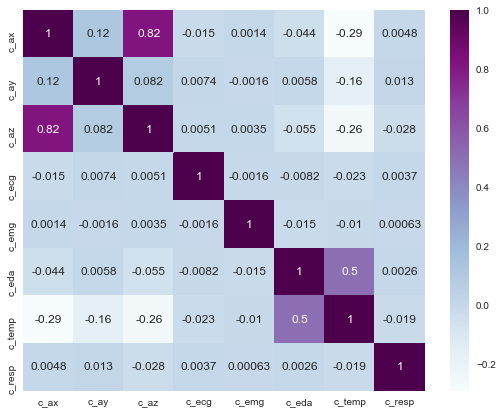

In [31]:
plt.figure(figsize=(9,7))
sns.heatmap(x_train.corr(), annot=True, cmap=plt.cm.BuPu);

# XGBoost 
(colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2)

In [31]:
evalSet = [(x_train, y_train), (x_test, y_test)] 

In [32]:
xg_class = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

xg_allChest = xg_class.fit(x_train,y_train, 
                              eval_metric='merror', 
                              eval_set = evalSet) 

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15:51:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[15:51:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 488 extra nodes, 166 pruned nodes, max_depth=10
[15:51:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 354 extra nodes, 200 pruned nodes, max_depth=10
[15:51:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 280 extra nodes, 192 pruned nodes, max_depth=10
[15:51:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost

[15:52:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 286 extra nodes, 108 pruned nodes, max_depth=10
[15:52:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 56 pruned nodes, max_depth=10
[5]	validation_0-merror:0.22794	validation_1-merror:0.22860
[15:52:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 476 extra nodes, 136 pruned nodes, max_depth=10
[15:52:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 476 extra nodes, 156 pruned nodes, max_depth=10
[15:52:10] INFO: C:/buildkite

[15:52:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 202 extra nodes, 122 pruned nodes, max_depth=10
[15:52:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 124 pruned nodes, max_depth=10
[15:53:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 92 pruned nodes, max_depth=10
[11]	validation_0-merror:0.14408	validation_1-merror:0.14424
[15:53:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 456 extra nodes, 278 pruned nodes, max_depth=10
[15:53:04] INFO: C:/buildkit

[15:53:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 64 pruned nodes, max_depth=10
[15:53:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 232 extra nodes, 106 pruned nodes, max_depth=10
[15:53:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 84 pruned nodes, max_depth=10
[15:53:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 82 pruned nodes, max_depth=10
[17]	validation_0-merror:0.09733	validation_1-merror:0.09777
[15:53:57] INFO: C:/buildkite-a

[15:54:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 110 pruned nodes, max_depth=10
[15:54:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 380 pruned nodes, max_depth=10
[15:54:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 54 pruned nodes, max_depth=10
[15:54:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 176 extra nodes, 110 pruned nodes, max_depth=10
[15:54:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0302

[28]	validation_0-merror:0.07652	validation_1-merror:0.07686
[15:55:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 402 extra nodes, 176 pruned nodes, max_depth=10
[15:55:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 102 pruned nodes, max_depth=10
[15:55:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 174 extra nodes, 110 pruned nodes, max_depth=10
[15:55:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 142 pruned nodes, max_depth=10
[15:55:42] INFO: C:/buildki

[15:56:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 124 pruned nodes, max_depth=10
[34]	validation_0-merror:0.05659	validation_1-merror:0.05717
[15:56:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 322 pruned nodes, max_depth=10
[15:56:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 432 extra nodes, 194 pruned nodes, max_depth=10
[15:56:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 212 extra nodes, 174 pruned nodes, max_depth=10
[15:56:36] INFO: C:/buildkite

[15:57:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 118 pruned nodes, max_depth=10
[15:57:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 38 pruned nodes, max_depth=9
[40]	validation_0-merror:0.04571	validation_1-merror:0.04614
[15:57:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 224 extra nodes, 336 pruned nodes, max_depth=10
[15:57:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 362 extra nodes, 230 pruned nodes, max_depth=10
[15:57:29] INFO: C:/buildkite-

[15:58:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 110 pruned nodes, max_depth=10
[15:58:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 108 pruned nodes, max_depth=10
[15:58:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 94 pruned nodes, max_depth=10
[46]	validation_0-merror:0.04292	validation_1-merror:0.04324
[15:58:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 640 extra nodes, 418 pruned nodes, max_depth=10
[15:58:23] INFO: C:/buildkite

[15:59:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 298 pruned nodes, max_depth=10
[15:59:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 140 pruned nodes, max_depth=10
[15:59:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 420 pruned nodes, max_depth=10
[15:59:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 88 pruned nodes, max_depth=8
[52]	validation_0-merror:0.04081	validation_1-merror:0.04106
[15:59:17] INFO: C:/buildkite-a

[16:00:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 202 extra nodes, 150 pruned nodes, max_depth=10
[16:00:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 186 pruned nodes, max_depth=10
[16:00:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 108 pruned nodes, max_depth=10
[16:00:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 184 pruned nodes, max_depth=10
[16:00:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0302

[63]	validation_0-merror:0.03464	validation_1-merror:0.03499
[16:00:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 214 pruned nodes, max_depth=10
[16:01:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 110 pruned nodes, max_depth=7
[16:01:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 370 pruned nodes, max_depth=10
[16:01:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 254 pruned nodes, max_depth=10
[16:01:05] INFO: C:/buildkite-

[16:01:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 52 pruned nodes, max_depth=8
[69]	validation_0-merror:0.03313	validation_1-merror:0.03342
[16:02:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 460 pruned nodes, max_depth=8
[16:02:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 212 extra nodes, 178 pruned nodes, max_depth=10
[16:02:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 92 pruned nodes, max_depth=10
[16:02:08] INFO: C:/buildkite-agen

[16:02:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 136 pruned nodes, max_depth=10
[16:02:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 50 pruned nodes, max_depth=10
[75]	validation_0-merror:0.03148	validation_1-merror:0.03194
[16:03:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 412 extra nodes, 176 pruned nodes, max_depth=10
[16:03:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 250 pruned nodes, max_depth=7
[16:03:04] INFO: C:/buildkite-a

[16:03:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 252 pruned nodes, max_depth=10
[16:03:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 128 pruned nodes, max_depth=10
[16:03:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 70 pruned nodes, max_depth=8
[81]	validation_0-merror:0.02938	validation_1-merror:0.02954
[16:03:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 254 extra nodes, 324 pruned nodes, max_depth=10
[16:03:58] INFO: C:/buildkite-a

[16:04:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 76 pruned nodes, max_depth=10
[16:04:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 108 pruned nodes, max_depth=10
[16:04:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 110 pruned nodes, max_depth=10
[16:04:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 50 pruned nodes, max_depth=8
[87]	validation_0-merror:0.02871	validation_1-merror:0.02893
[16:04:59] INFO: C:/buildkite-age

[16:05:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 184 pruned nodes, max_depth=6
[16:05:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 144 pruned nodes, max_depth=10
[16:05:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 402 pruned nodes, max_depth=5
[16:06:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 98 pruned nodes, max_depth=10
[16:06:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36

[98]	validation_0-merror:0.02662	validation_1-merror:0.02677
[16:06:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 418 pruned nodes, max_depth=4
[16:06:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 220 pruned nodes, max_depth=10
[16:06:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 138 pruned nodes, max_depth=10
[16:06:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 214 pruned nodes, max_depth=10
[16:06:55] INFO: C:/buildkite-

[16:07:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 90 pruned nodes, max_depth=10
[104]	validation_0-merror:0.02600	validation_1-merror:0.02622
[16:07:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 440 pruned nodes, max_depth=10
[16:07:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 92 pruned nodes, max_depth=8
[16:07:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 110 pruned nodes, max_depth=6
[16:07:51] INFO: C:/buildkite-age

[16:08:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 160 pruned nodes, max_depth=10
[16:08:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 88 pruned nodes, max_depth=10
[110]	validation_0-merror:0.02541	validation_1-merror:0.02561
[16:08:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 188 extra nodes, 292 pruned nodes, max_depth=10
[16:08:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 148 pruned nodes, max_depth=3
[16:08:44] INFO: C:/buildkite-ag

[16:09:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 26 pruned nodes, max_depth=10
[16:09:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 230 pruned nodes, max_depth=10
[16:09:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 58 pruned nodes, max_depth=5
[116]	validation_0-merror:0.02477	validation_1-merror:0.02511
[16:09:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 246 extra nodes, 164 pruned nodes, max_depth=10
[16:09:47] INFO: C:/buildkite-ag

[16:10:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 312 pruned nodes, max_depth=10
[16:10:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 152 pruned nodes, max_depth=9
[16:10:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 92 pruned nodes, max_depth=10
[16:10:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 62 pruned nodes, max_depth=8
[122]	validation_0-merror:0.02425	validation_1-merror:0.02462
[16:10:42] INFO: C:/buildkite-ag

[16:11:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 352 pruned nodes, max_depth=10
[16:11:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 170 pruned nodes, max_depth=7
[16:11:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 108 pruned nodes, max_depth=10
[16:11:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 86 pruned nodes, max_depth=5
[16:11:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36

[133]	validation_0-merror:0.02287	validation_1-merror:0.02333
[16:12:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 250 pruned nodes, max_depth=10
[16:12:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 232 pruned nodes, max_depth=10
[16:12:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 222 pruned nodes, max_depth=7
[16:12:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 244 extra nodes, 296 pruned nodes, max_depth=10
[16:12:35] INFO: C:/buildkit

[16:13:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 114 pruned nodes, max_depth=8
[139]	validation_0-merror:0.02235	validation_1-merror:0.02288
[16:13:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 286 extra nodes, 510 pruned nodes, max_depth=10
[16:13:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 300 pruned nodes, max_depth=9
[16:13:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 74 pruned nodes, max_depth=1
[16:13:38] INFO: C:/buildkite-agen

[16:14:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 112 pruned nodes, max_depth=10
[16:14:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 174 pruned nodes, max_depth=10
[145]	validation_0-merror:0.02200	validation_1-merror:0.02259
[16:14:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 242 pruned nodes, max_depth=10
[16:14:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 350 pruned nodes, max_depth=10
[16:14:32] INFO: C:/buildkit

[16:15:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 244 extra nodes, 280 pruned nodes, max_depth=10
[16:15:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 194 pruned nodes, max_depth=10
[16:15:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 98 pruned nodes, max_depth=9
[151]	validation_0-merror:0.02160	validation_1-merror:0.02222
[16:15:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 392 pruned nodes, max_depth=10
[16:15:36] INFO: C:/buildkite

[16:16:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 150 pruned nodes, max_depth=9
[16:16:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 110 pruned nodes, max_depth=10
[16:16:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 174 extra nodes, 140 pruned nodes, max_depth=10
[16:16:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 70 pruned nodes, max_depth=4
[157]	validation_0-merror:0.02108	validation_1-merror:0.02172
[16:16:30] INFO: C:/buildkite-a

[16:17:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 142 pruned nodes, max_depth=10
[16:17:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 146 pruned nodes, max_depth=3
[16:17:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 220 extra nodes, 490 pruned nodes, max_depth=10
[16:17:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 252 pruned nodes, max_depth=8
[16:17:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36

[168]	validation_0-merror:0.02040	validation_1-merror:0.02102
[16:18:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 166 extra nodes, 592 pruned nodes, max_depth=10
[16:18:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 298 pruned nodes, max_depth=4
[16:18:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 74 pruned nodes, max_depth=10
[16:18:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 234 pruned nodes, max_depth=10
[16:18:27] INFO: C:/buildkite-a

[16:19:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 58 pruned nodes, max_depth=9
[174]	validation_0-merror:0.02008	validation_1-merror:0.02072
[16:19:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 592 pruned nodes, max_depth=3
[16:19:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 280 pruned nodes, max_depth=4
[16:19:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 156 pruned nodes, max_depth=0
[16:19:23] INFO: C:/buildkite-agent/b

[16:20:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 186 pruned nodes, max_depth=10
[16:20:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 82 pruned nodes, max_depth=6
[180]	validation_0-merror:0.01976	validation_1-merror:0.02045
[16:20:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 386 pruned nodes, max_depth=2
[16:20:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 242 pruned nodes, max_depth=10
[16:20:27] INFO: C:/buildkite-age

[16:21:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 84 pruned nodes, max_depth=10
[16:21:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 140 pruned nodes, max_depth=10
[16:21:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 108 pruned nodes, max_depth=7
[186]	validation_0-merror:0.01943	validation_1-merror:0.02011
[16:21:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 448 pruned nodes, max_depth=2
[16:21:20] INFO: C:/buildkite-ag

[16:22:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 62 pruned nodes, max_depth=10
[16:22:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 430 pruned nodes, max_depth=10
[16:22:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 224 pruned nodes, max_depth=9
[16:22:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 146 pruned nodes, max_depth=8
[192]	validation_0-merror:0.01900	validation_1-merror:0.01970
[16:22:14] INFO: C:/buildkite-ag

[16:23:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 384 pruned nodes, max_depth=1
[16:23:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 48 pruned nodes, max_depth=4
[16:23:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 146 pruned nodes, max_depth=7
[16:23:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 252 pruned nodes, max_depth=3
[16:23:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46

[203]	validation_0-merror:0.01859	validation_1-merror:0.01940
[16:24:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 272 extra nodes, 482 pruned nodes, max_depth=10
[16:24:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 116 pruned nodes, max_depth=5
[16:24:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 152 pruned nodes, max_depth=5
[16:24:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 364 pruned nodes, max_depth=7
[16:24:14] INFO: C:/buildkite-ag

[16:25:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 88 pruned nodes, max_depth=6
[209]	validation_0-merror:0.01833	validation_1-merror:0.01917
[16:25:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 704 pruned nodes, max_depth=10
[16:25:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 168 pruned nodes, max_depth=1
[16:25:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 82 pruned nodes, max_depth=5
[16:25:19] INFO: C:/buildkite-agent

[16:26:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 160 pruned nodes, max_depth=10
[16:26:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 48 pruned nodes, max_depth=8
[215]	validation_0-merror:0.01807	validation_1-merror:0.01893
[16:26:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 594 pruned nodes, max_depth=3
[16:26:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 202 pruned nodes, max_depth=10
[16:26:22] INFO: C:/buildkite-agen

[16:27:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 96 pruned nodes, max_depth=10
[16:27:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 234 pruned nodes, max_depth=10
[16:27:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 54 pruned nodes, max_depth=8
[221]	validation_0-merror:0.01784	validation_1-merror:0.01873
[16:27:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 254 extra nodes, 144 pruned nodes, max_depth=10
[16:27:15] INFO: C:/buildkite-a

[16:28:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 148 pruned nodes, max_depth=7
[16:28:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 144 pruned nodes, max_depth=10
[16:28:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 128 pruned nodes, max_depth=10
[16:28:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 84 pruned nodes, max_depth=7
[227]	validation_0-merror:0.01746	validation_1-merror:0.01830
[16:28:11] INFO: C:/buildkite-ag

[16:29:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 264 pruned nodes, max_depth=10
[16:29:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 142 pruned nodes, max_depth=0
[16:29:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 94 pruned nodes, max_depth=10
[16:29:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 86 pruned nodes, max_depth=10
[16:29:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e

[238]	validation_0-merror:0.01703	validation_1-merror:0.01788
[16:30:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 238 pruned nodes, max_depth=10
[16:30:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 180 pruned nodes, max_depth=10
[16:30:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 212 pruned nodes, max_depth=6
[16:30:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 222 pruned nodes, max_depth=10
[16:30:06] INFO: C:/buildkite-

[16:31:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 54 pruned nodes, max_depth=9
[244]	validation_0-merror:0.01689	validation_1-merror:0.01775
[16:31:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 294 pruned nodes, max_depth=4
[16:31:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 184 pruned nodes, max_depth=8
[16:31:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 136 pruned nodes, max_depth=0
[16:31:10] INFO: C:/buildkite-agent/b

[16:32:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 156 pruned nodes, max_depth=9
[16:32:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 108 pruned nodes, max_depth=2
[250]	validation_0-merror:0.01669	validation_1-merror:0.01753
[16:32:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 530 pruned nodes, max_depth=9
[16:32:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 180 pruned nodes, max_depth=7
[16:32:12] INFO: C:/buildkite-agent

[16:33:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 292 pruned nodes, max_depth=10
[16:33:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 162 pruned nodes, max_depth=6
[16:33:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 78 pruned nodes, max_depth=2
[256]	validation_0-merror:0.01647	validation_1-merror:0.01736
[16:33:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 658 pruned nodes, max_depth=3
[16:33:07] INFO: C:/buildkite-agent

[16:33:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 132 pruned nodes, max_depth=0
[16:33:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 182 extra nodes, 388 pruned nodes, max_depth=10
[16:33:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 212 pruned nodes, max_depth=9
[16:34:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 110 pruned nodes, max_depth=10
[262]	validation_0-merror:0.01632	validation_1-merror:0.01720
[16:34:02] INFO: C:/buildkite-ag

[16:34:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 108 pruned nodes, max_depth=10
[16:34:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 32 pruned nodes, max_depth=4
[16:34:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 228 pruned nodes, max_depth=10
[16:34:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 198 pruned nodes, max_depth=10
[16:34:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[273]	validation_0-merror:0.01605	validation_1-merror:0.01703
[16:35:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 432 pruned nodes, max_depth=1
[16:35:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 158 pruned nodes, max_depth=0
[16:35:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 88 pruned nodes, max_depth=7
[16:35:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 258 pruned nodes, max_depth=0
[16:35:58] INFO: C:/buildkite-agent/bu

[16:36:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 94 pruned nodes, max_depth=2
[279]	validation_0-merror:0.01595	validation_1-merror:0.01698
[16:36:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 256 pruned nodes, max_depth=9
[16:36:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 316 pruned nodes, max_depth=10
[16:36:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 48 pruned nodes, max_depth=4
[16:36:53] INFO: C:/buildkite-agent/

[16:37:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 180 pruned nodes, max_depth=8
[16:37:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 212 pruned nodes, max_depth=10
[285]	validation_0-merror:0.01586	validation_1-merror:0.01690
[16:37:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 638 pruned nodes, max_depth=9
[16:37:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 100 pruned nodes, max_depth=5
[16:37:58] INFO: C:/buildkite-age

[16:38:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 186 pruned nodes, max_depth=3
[16:38:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 128 pruned nodes, max_depth=0
[16:38:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 68 pruned nodes, max_depth=8
[291]	validation_0-merror:0.01573	validation_1-merror:0.01672
[16:38:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 576 pruned nodes, max_depth=8
[16:38:52] INFO: C:/buildkite-agent/b

[16:39:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 136 pruned nodes, max_depth=8
[16:39:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 342 pruned nodes, max_depth=1
[16:39:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 154 pruned nodes, max_depth=1
[16:39:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 174 pruned nodes, max_depth=4
[297]	validation_0-merror:0.01563	validation_1-merror:0.01663
[16:39:57] INFO: C:/buildkite-agent/

In [33]:
xg_class_pred = xg_class.predict(x_test)
xg_class_report = (classification_report(y_test,
                                         xg_class_pred,
                                         labels=np.unique(xg_class_pred),
                                         digits=4))

print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(y_test, xg_class_pred)))
print('----------------------------------------')
print('------------Classification Report------------')
print(xg_class_report)

----------------------------------------
Balanced Accuracy: 0.9786
----------------------------------------
------------Classification Report------------
              precision    recall  f1-score   support

           0     0.9873    0.9770    0.9821    242743
           1     0.9928    0.9959    0.9944    138650
           2     0.9963    0.9922    0.9942     31971
           3     0.9489    0.9755    0.9620     46976
           4     0.9716    0.9866    0.9790     54384
           5     0.9354    0.9445    0.9399      7155

    accuracy                         0.9834    521879
   macro avg     0.9720    0.9786    0.9753    521879
weighted avg     0.9835    0.9834    0.9834    521879



# QDA + Normalization + Cross Validation = 10

In [34]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8871    0.8691    0.8780   1211982
         1.0     0.9844    0.9013    0.9411    693218
         2.0     0.7624    0.8202    0.7902    159718
         3.0     0.8349    0.8922    0.8626    235242
         4.0     0.8643    0.9630    0.9110    272893
         5.0     0.5764    0.9520    0.7180     36340

    accuracy                         0.8877   2609393
   macro avg     0.8183    0.8996    0.8502   2609393
weighted avg     0.8939    0.8877    0.8892   2609393



# KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8863    0.7468    0.8106   1211982
         1.0     0.8287    0.9271    0.8751    693218
         2.0     0.7621    0.9440    0.8434    159718
         3.0     0.7932    0.8794    0.8341    235242
         4.0     0.8407    0.9144    0.8761    272893
         5.0     0.5095    0.8022    0.6232     36340

    accuracy                         0.8370   2609393
   macro avg     0.7701    0.8690    0.8104   2609393
weighted avg     0.8450    0.8370    0.8361   2609393



# Individual and Combined Features 
Model shortChest: Less Electromyogram and Model ACC TEMP EDA

### Model shortChest: Less Electromyogram

#### XGBoost 

In [36]:
ch_short = c_loc[['c_ax', 'c_ay', 'c_az', 'c_eda', 'c_temp', 'c_resp', 'c_ecg', 'w_label']]
y = ch_short.w_label
x = ch_short.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 
print(x_train.shape)
print(y_test.shape)

(3060960, 7)
(765240,)


In [37]:
shortChest = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

model_shortChest = shortChest.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17:00:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[17:00:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 480 extra nodes, 190 pruned nodes, max_depth=10
[17:00:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 108 pruned nodes, max_depth=10
[17:00:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 402 extra nodes, 180 pruned nodes, max_depth=10
[17:00:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost

[17:01:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 450 extra nodes, 304 pruned nodes, max_depth=10
[6]	validation_0-merror:0.07191	validation_1-merror:0.07202
[17:01:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 646 extra nodes, 160 pruned nodes, max_depth=10
[17:01:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 382 extra nodes, 248 pruned nodes, max_depth=10
[17:01:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 440 extra nodes, 324 pruned nodes, max_depth=10
[17:01:55] INFO: C:/buildkit

[17:03:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 348 extra nodes, 96 pruned nodes, max_depth=10
[13]	validation_0-merror:0.06628	validation_1-merror:0.06641
[17:03:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 528 extra nodes, 174 pruned nodes, max_depth=10
[17:03:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 72 pruned nodes, max_depth=10
[17:03:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 322 extra nodes, 166 pruned nodes, max_depth=10
[17:03:23] INFO: C:/buildkite

[17:04:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 230 extra nodes, 156 pruned nodes, max_depth=10
[20]	validation_0-merror:0.05195	validation_1-merror:0.05227
[17:04:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 488 extra nodes, 538 pruned nodes, max_depth=10
[17:04:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 106 pruned nodes, max_depth=10
[17:04:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 170 pruned nodes, max_depth=10
[17:04:43] INFO: C:/buildki

[17:05:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 240 extra nodes, 168 pruned nodes, max_depth=10
[27]	validation_0-merror:0.03788	validation_1-merror:0.03827
[17:05:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 448 extra nodes, 216 pruned nodes, max_depth=10
[17:05:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 346 extra nodes, 144 pruned nodes, max_depth=10
[17:06:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 260 extra nodes, 390 pruned nodes, max_depth=10
[17:06:02] INFO: C:/buildki

[17:07:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 130 pruned nodes, max_depth=10
[34]	validation_0-merror:0.03412	validation_1-merror:0.03453
[17:07:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 446 extra nodes, 638 pruned nodes, max_depth=10
[17:07:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 130 pruned nodes, max_depth=10
[17:07:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 196 extra nodes, 302 pruned nodes, max_depth=10
[17:07:32] INFO: C:/buildkit

[17:08:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 158 extra nodes, 170 pruned nodes, max_depth=10
[41]	validation_0-merror:0.03139	validation_1-merror:0.03167
[17:08:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 394 extra nodes, 232 pruned nodes, max_depth=10
[17:08:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 272 extra nodes, 150 pruned nodes, max_depth=10
[17:08:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 204 extra nodes, 374 pruned nodes, max_depth=10
[17:08:52] INFO: C:/buildki

[17:10:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 272 extra nodes, 232 pruned nodes, max_depth=10
[48]	validation_0-merror:0.03010	validation_1-merror:0.03049
[17:10:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 412 extra nodes, 194 pruned nodes, max_depth=10
[17:10:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 96 pruned nodes, max_depth=10
[17:10:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 110 pruned nodes, max_depth=10
[17:10:11] INFO: C:/buildkite

[17:11:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 134 pruned nodes, max_depth=10
[55]	validation_0-merror:0.02762	validation_1-merror:0.02808
[17:11:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 384 extra nodes, 226 pruned nodes, max_depth=10
[17:11:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 112 pruned nodes, max_depth=10
[17:11:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 150 pruned nodes, max_depth=10
[17:11:30] INFO: C:/buildkit

[17:12:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 240 extra nodes, 158 pruned nodes, max_depth=10
[62]	validation_0-merror:0.02600	validation_1-merror:0.02654
[17:13:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 354 extra nodes, 248 pruned nodes, max_depth=10
[17:13:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 134 pruned nodes, max_depth=10
[17:13:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 158 pruned nodes, max_depth=10
[17:13:08] INFO: C:/buildki

[17:14:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 134 pruned nodes, max_depth=10
[69]	validation_0-merror:0.02483	validation_1-merror:0.02529
[17:14:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 182 extra nodes, 402 pruned nodes, max_depth=10
[17:14:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 292 pruned nodes, max_depth=10
[17:14:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 156 extra nodes, 202 pruned nodes, max_depth=10
[17:14:47] INFO: C:/buildki

[17:16:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 178 pruned nodes, max_depth=10
[76]	validation_0-merror:0.02356	validation_1-merror:0.02407
[17:16:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 420 extra nodes, 186 pruned nodes, max_depth=10
[17:16:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 114 pruned nodes, max_depth=10
[17:16:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 222 extra nodes, 114 pruned nodes, max_depth=10
[17:16:14] INFO: C:/buildkit

[17:17:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 74 pruned nodes, max_depth=10
[83]	validation_0-merror:0.02224	validation_1-merror:0.02282
[17:17:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 266 extra nodes, 164 pruned nodes, max_depth=10
[17:17:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 280 pruned nodes, max_depth=10
[17:17:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 290 pruned nodes, max_depth=10
[17:17:42] INFO: C:/buildkite-

[17:19:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 154 pruned nodes, max_depth=10
[90]	validation_0-merror:0.02132	validation_1-merror:0.02190
[17:19:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 308 extra nodes, 272 pruned nodes, max_depth=10
[17:19:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 420 pruned nodes, max_depth=10
[17:19:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 160 pruned nodes, max_depth=10
[17:19:19] INFO: C:/buildki

[17:20:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 234 extra nodes, 218 pruned nodes, max_depth=10
[97]	validation_0-merror:0.02042	validation_1-merror:0.02103
[17:20:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 222 pruned nodes, max_depth=10
[17:20:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 154 pruned nodes, max_depth=10
[17:21:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 218 extra nodes, 100 pruned nodes, max_depth=10
[17:21:03] INFO: C:/buildkit

[17:22:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 178 pruned nodes, max_depth=10
[104]	validation_0-merror:0.01992	validation_1-merror:0.02059
[17:22:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 266 extra nodes, 208 pruned nodes, max_depth=10
[17:22:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 178 pruned nodes, max_depth=10
[17:22:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 204 pruned nodes, max_depth=9
[17:22:28] INFO: C:/buildkite-

[17:23:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 126 pruned nodes, max_depth=10
[111]	validation_0-merror:0.01938	validation_1-merror:0.02005
[17:23:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 224 extra nodes, 244 pruned nodes, max_depth=10
[17:23:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 82 pruned nodes, max_depth=10
[17:24:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 242 extra nodes, 116 pruned nodes, max_depth=10
[17:24:03] INFO: C:/buildkit

[17:25:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 116 pruned nodes, max_depth=10
[118]	validation_0-merror:0.01867	validation_1-merror:0.01932
[17:25:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 460 pruned nodes, max_depth=10
[17:25:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 108 pruned nodes, max_depth=10
[17:25:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 250 pruned nodes, max_depth=9
[17:25:28] INFO: C:/buildkite-

[17:26:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 170 pruned nodes, max_depth=9
[125]	validation_0-merror:0.01810	validation_1-merror:0.01874
[17:26:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 416 extra nodes, 282 pruned nodes, max_depth=10
[17:26:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 138 pruned nodes, max_depth=10
[17:27:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 178 pruned nodes, max_depth=8
[17:27:11] INFO: C:/buildkite-a

[17:28:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 126 pruned nodes, max_depth=10
[132]	validation_0-merror:0.01741	validation_1-merror:0.01811
[17:28:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 540 pruned nodes, max_depth=10
[17:28:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 180 pruned nodes, max_depth=7
[17:28:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 176 pruned nodes, max_depth=8
[17:28:37] INFO: C:/buildkite-a

[17:30:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 90 pruned nodes, max_depth=10
[139]	validation_0-merror:0.01707	validation_1-merror:0.01777
[17:30:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 292 extra nodes, 168 pruned nodes, max_depth=10
[17:30:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 118 pruned nodes, max_depth=9
[17:30:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 172 pruned nodes, max_depth=9
[17:30:11] INFO: C:/buildkite-ag

[17:31:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 210 pruned nodes, max_depth=10
[146]	validation_0-merror:0.01655	validation_1-merror:0.01733
[17:31:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 252 pruned nodes, max_depth=10
[17:31:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 174 pruned nodes, max_depth=10
[17:31:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 160 pruned nodes, max_depth=10
[17:31:36] INFO: C:/buildkite

[17:33:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 166 extra nodes, 118 pruned nodes, max_depth=10
[153]	validation_0-merror:0.01620	validation_1-merror:0.01702
[17:33:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 614 pruned nodes, max_depth=10
[17:33:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 164 pruned nodes, max_depth=10
[17:33:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 128 pruned nodes, max_depth=9
[17:33:11] INFO: C:/buildkite

[17:34:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 256 extra nodes, 294 pruned nodes, max_depth=10
[160]	validation_0-merror:0.01591	validation_1-merror:0.01671
[17:34:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 652 pruned nodes, max_depth=10
[17:34:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 184 pruned nodes, max_depth=9
[17:34:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 282 pruned nodes, max_depth=10
[17:34:37] INFO: C:/buildkite

[17:35:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 166 extra nodes, 278 pruned nodes, max_depth=10
[167]	validation_0-merror:0.01560	validation_1-merror:0.01642
[17:35:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 174 extra nodes, 208 pruned nodes, max_depth=10
[17:35:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 218 pruned nodes, max_depth=10
[17:36:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 162 pruned nodes, max_depth=7
[17:36:02] INFO: C:/buildkite

[17:37:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 178 extra nodes, 152 pruned nodes, max_depth=10
[174]	validation_0-merror:0.01529	validation_1-merror:0.01606
[17:37:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 264 pruned nodes, max_depth=10
[17:37:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 192 pruned nodes, max_depth=9
[17:37:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 206 pruned nodes, max_depth=6
[17:37:26] INFO: C:/buildkite-

[17:38:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 174 extra nodes, 116 pruned nodes, max_depth=10
[181]	validation_0-merror:0.01497	validation_1-merror:0.01571
[17:38:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 146 pruned nodes, max_depth=10
[17:38:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 156 pruned nodes, max_depth=6
[17:38:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 374 pruned nodes, max_depth=6
[17:38:57] INFO: C:/buildkite-

[17:40:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 150 pruned nodes, max_depth=10
[188]	validation_0-merror:0.01478	validation_1-merror:0.01549
[17:40:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 270 extra nodes, 338 pruned nodes, max_depth=10
[17:40:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 210 pruned nodes, max_depth=10
[17:40:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 186 pruned nodes, max_depth=6
[17:40:18] INFO: C:/buildkit

[17:41:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 192 pruned nodes, max_depth=10
[195]	validation_0-merror:0.01454	validation_1-merror:0.01525
[17:41:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 248 pruned nodes, max_depth=10
[17:41:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 54 pruned nodes, max_depth=10
[17:41:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 250 pruned nodes, max_depth=10
[17:41:46] INFO: C:/buildkite

[17:43:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 320 pruned nodes, max_depth=10
[202]	validation_0-merror:0.01427	validation_1-merror:0.01503
[17:43:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 262 extra nodes, 192 pruned nodes, max_depth=10
[17:43:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 184 pruned nodes, max_depth=10
[17:43:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 274 pruned nodes, max_depth=9
[17:43:15] INFO: C:/buildkit

[17:44:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 290 pruned nodes, max_depth=10
[209]	validation_0-merror:0.01403	validation_1-merror:0.01480
[17:44:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 230 pruned nodes, max_depth=10
[17:44:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 66 pruned nodes, max_depth=10
[17:44:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 80 pruned nodes, max_depth=10
[17:44:55] INFO: C:/buildkite-a

[17:46:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 230 extra nodes, 336 pruned nodes, max_depth=10
[216]	validation_0-merror:0.01374	validation_1-merror:0.01451
[17:46:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 200 pruned nodes, max_depth=10
[17:46:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 178 pruned nodes, max_depth=8
[17:46:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 174 pruned nodes, max_depth=10
[17:46:30] INFO: C:/buildkite

[17:47:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 126 pruned nodes, max_depth=10
[223]	validation_0-merror:0.01353	validation_1-merror:0.01434
[17:47:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 228 extra nodes, 384 pruned nodes, max_depth=10
[17:47:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 212 pruned nodes, max_depth=10
[17:47:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 108 pruned nodes, max_depth=7
[17:47:53] INFO: C:/buildkite-

[17:48:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 298 pruned nodes, max_depth=10
[230]	validation_0-merror:0.01333	validation_1-merror:0.01418
[17:48:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 294 extra nodes, 276 pruned nodes, max_depth=10
[17:48:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 296 pruned nodes, max_depth=10
[17:48:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 244 pruned nodes, max_depth=9
[17:48:54] INFO: C:/buildkite

[17:49:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 230 pruned nodes, max_depth=8
[237]	validation_0-merror:0.01316	validation_1-merror:0.01396
[17:49:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 488 pruned nodes, max_depth=10
[17:49:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 206 pruned nodes, max_depth=10
[17:49:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 136 pruned nodes, max_depth=8
[17:49:52] INFO: C:/buildkite-ag

[17:50:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 146 pruned nodes, max_depth=10
[244]	validation_0-merror:0.01301	validation_1-merror:0.01387
[17:50:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 328 pruned nodes, max_depth=10
[17:50:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 174 pruned nodes, max_depth=6
[17:50:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 160 pruned nodes, max_depth=10
[17:50:50] INFO: C:/buildkite-

[17:51:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 286 pruned nodes, max_depth=10
[251]	validation_0-merror:0.01288	validation_1-merror:0.01374
[17:51:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 244 extra nodes, 340 pruned nodes, max_depth=10
[17:51:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 108 pruned nodes, max_depth=5
[17:51:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 242 pruned nodes, max_depth=10
[17:51:47] INFO: C:/buildkite-

[17:52:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 330 pruned nodes, max_depth=10
[258]	validation_0-merror:0.01276	validation_1-merror:0.01362
[17:52:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 228 extra nodes, 412 pruned nodes, max_depth=10
[17:52:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 192 pruned nodes, max_depth=7
[17:52:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 216 pruned nodes, max_depth=7
[17:52:53] INFO: C:/buildkite-

[17:53:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 110 pruned nodes, max_depth=10
[265]	validation_0-merror:0.01266	validation_1-merror:0.01351
[17:53:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 348 pruned nodes, max_depth=10
[17:53:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 200 pruned nodes, max_depth=9
[17:53:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 286 pruned nodes, max_depth=10
[17:53:52] INFO: C:/buildkite-

[17:54:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 168 pruned nodes, max_depth=10
[272]	validation_0-merror:0.01249	validation_1-merror:0.01337
[17:54:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 542 pruned nodes, max_depth=10
[17:54:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 222 pruned nodes, max_depth=4
[17:54:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 186 pruned nodes, max_depth=9
[17:54:50] INFO: C:/buildkite-a

[17:55:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 322 pruned nodes, max_depth=10
[279]	validation_0-merror:0.01237	validation_1-merror:0.01328
[17:55:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 336 pruned nodes, max_depth=10
[17:55:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 266 pruned nodes, max_depth=10
[17:55:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 220 pruned nodes, max_depth=10
[17:55:48] INFO: C:/buildkite

[17:56:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 174 pruned nodes, max_depth=10
[286]	validation_0-merror:0.01227	validation_1-merror:0.01319
[17:56:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 622 pruned nodes, max_depth=10
[17:56:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 194 pruned nodes, max_depth=10
[17:56:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 248 pruned nodes, max_depth=7
[17:56:47] INFO: C:/buildkite-a

[17:57:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 120 pruned nodes, max_depth=10
[293]	validation_0-merror:0.01217	validation_1-merror:0.01310
[17:57:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 306 pruned nodes, max_depth=10
[17:57:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 142 pruned nodes, max_depth=6
[17:57:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 124 pruned nodes, max_depth=4
[17:57:43] INFO: C:/buildkite-a

In [38]:
shortChest_pred = shortChest.predict(x_test)
shortChest_report = (classification_report(y_test, 
                                         shortChest_pred, 
                                         labels = np.unique(shortChest_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, shortChest_pred))
print('---------------------------------------')
print('------------All Chest less EMG Classification Report------------')
print(shortChest_report)

Balanced Accuracy: 0.9871399232326775
---------------------------------------
------------All Chest less EMG Classification Report------------
              precision    recall  f1-score   support

           0     0.9892    0.9818    0.9854    343212
           1     0.9943    0.9967    0.9955    165321
           2     0.9947    0.9911    0.9929     94208
           3     0.9511    0.9760    0.9634     51513
           4     0.9798    0.9901    0.9849    110986

    accuracy                         0.9870    765240
   macro avg     0.9818    0.9871    0.9844    765240
weighted avg     0.9870    0.9870    0.9870    765240



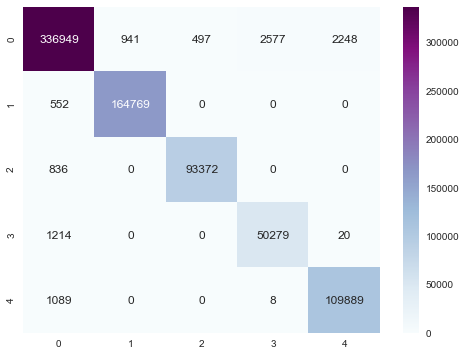

In [39]:
cm = confusion_matrix(y_test, shortChest_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu );

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


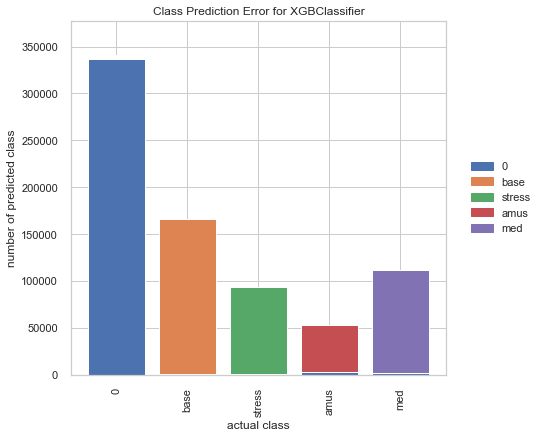

In [40]:
sns.set(style="whitegrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(shortChest, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [41]:
def multiclass_roc_auc_score(y_test, shortChest_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(shortChest_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, shortChest_pred)

print('All Chest less EMG')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))  

All Chest less EMG
-------------------
AUC: 99.18%


#### KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [42]:
Q1 = ch_short.quantile(0.25)
Q3 = ch_short.quantile(0.75)
IQR = Q3 - Q1

In [43]:
ch_short_out = ch_short[~((ch_short < (ch_short - 1.5 * IQR)) |(ch_short > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ch_short_out.shape)

(3069164, 8)


In [44]:
#mean normalization 
norm_ch_short_out=(ch_short_out-ch_short_out.mean())/ch_short_out.std()
norm_y = ch_short_out.w_label #keep original labels Dont normalize labels
norm_x = norm_ch_short_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [45]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.000000e+00
c_ax      0.000000e+00
c_ay      0.000000e+00
c_az      0.000000e+00
c_eda     0.000000e+00
c_temp    0.000000e+00
c_resp    0.000000e+00
c_ecg     2.018168e-17
dtype: float64

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8963    0.7761    0.8319   1329027
         1.0     0.8673    0.9477    0.9057    786472
         2.0     0.7469    0.9515    0.8368    192387
         3.0     0.7891    0.8645    0.8251    240499
         4.0     0.8781    0.9281    0.9024    520779

    accuracy                         0.8638   3069164
   macro avg     0.8355    0.8936    0.8604   3069164
weighted avg     0.8680    0.8638    0.8626   3069164



#### QDA + Normalization + Cross Validation = 10

In [47]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9011    0.8751    0.8879   1329027
         1.0     0.9785    0.9472    0.9626    786472
         2.0     0.7775    0.8148    0.7957    192387
         3.0     0.8280    0.8906    0.8581    240499
         4.0     0.8915    0.9534    0.9214    520779

    accuracy                         0.9043   3069164
   macro avg     0.8753    0.8962    0.8851   3069164
weighted avg     0.9058    0.9043    0.9046   3069164



### Model ACC TEMP EDA

#### XGBoost

In [48]:
less_Emg_Ecg = c_loc[['c_eda', 'c_temp', 'c_ax', 'c_ay', 'c_az', 'w_label']]
y = less_Emg_Ecg.w_label
x = less_Emg_Ecg.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 

print(x_train.shape)
print(y_test.shape)

(3060960, 5)
(765240,)


In [49]:
accEdaTemp = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2)  

model_accEdaTemp = accEdaTemp.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18:11:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[18:12:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 254 extra nodes, 38 pruned nodes, max_depth=10
[18:12:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 40 pruned nodes, max_depth=10
[18:12:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 52 pruned nodes, max_depth=9
[18:12:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgbo

[18:12:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 20 pruned nodes, max_depth=9
[6]	validation_0-merror:0.21315	validation_1-merror:0.21261
[18:12:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 222 extra nodes, 56 pruned nodes, max_depth=10
[18:13:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 28 pruned nodes, max_depth=9
[18:13:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 70 pruned nodes, max_depth=9
[18:13:07] INFO: C:/buildkite-agent/bu

[18:14:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 8 pruned nodes, max_depth=6
[13]	validation_0-merror:0.17818	validation_1-merror:0.17732
[18:14:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 102 pruned nodes, max_depth=10
[18:14:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 26 pruned nodes, max_depth=8
[18:14:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 50 pruned nodes, max_depth=10
[18:14:13] INFO: C:/buildkite-agent/

[18:14:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 42 pruned nodes, max_depth=9
[20]	validation_0-merror:0.12435	validation_1-merror:0.12392
[18:15:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 94 pruned nodes, max_depth=10
[18:15:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 32 pruned nodes, max_depth=8
[18:15:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 40 pruned nodes, max_depth=8
[18:15:07] INFO: C:/buildkite-agent/bu

[18:16:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 20 pruned nodes, max_depth=8
[27]	validation_0-merror:0.10295	validation_1-merror:0.10270
[18:16:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 58 pruned nodes, max_depth=10
[18:16:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 24 pruned nodes, max_depth=8
[18:16:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 10 pruned nodes, max_depth=9
[18:16:06] INFO: C:/buildkite-agent/b

[18:17:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 20 pruned nodes, max_depth=7
[34]	validation_0-merror:0.09956	validation_1-merror:0.09922
[18:17:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 56 pruned nodes, max_depth=10
[18:17:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 22 pruned nodes, max_depth=5
[18:17:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 56 pruned nodes, max_depth=8
[18:17:06] INFO: C:/buildkite-agent/bu

[18:17:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 84 pruned nodes, max_depth=10
[41]	validation_0-merror:0.07695	validation_1-merror:0.07689
[18:17:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 92 pruned nodes, max_depth=9
[18:17:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 28 pruned nodes, max_depth=8
[18:17:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 16 pruned nodes, max_depth=10
[18:17:56] INFO: C:/buildkite-agent/b

[18:18:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 26 pruned nodes, max_depth=8
[48]	validation_0-merror:0.06999	validation_1-merror:0.06971
[18:18:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 84 pruned nodes, max_depth=10
[18:18:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 76 pruned nodes, max_depth=8
[18:18:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 62 pruned nodes, max_depth=7
[18:18:59] INFO: C:/buildkite-agent/b

[18:19:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 20 pruned nodes, max_depth=8
[55]	validation_0-merror:0.06768	validation_1-merror:0.06747
[18:19:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 84 pruned nodes, max_depth=9
[18:19:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 40 pruned nodes, max_depth=8
[18:20:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 60 pruned nodes, max_depth=7
[18:20:01] INFO: C:/buildkite-agent/bui

[18:20:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 104 pruned nodes, max_depth=9
[62]	validation_0-merror:0.06244	validation_1-merror:0.06233
[18:20:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 122 pruned nodes, max_depth=10
[18:20:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 88 pruned nodes, max_depth=9
[18:20:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 50 pruned nodes, max_depth=8
[18:20:54] INFO: C:/buildkite-agent/

[18:21:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 90 pruned nodes, max_depth=10
[69]	validation_0-merror:0.05958	validation_1-merror:0.05948
[18:21:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 150 pruned nodes, max_depth=7
[18:21:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 18 pruned nodes, max_depth=5
[18:21:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 54 pruned nodes, max_depth=10
[18:21:57] INFO: C:/buildkite-agent

[18:22:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 18 pruned nodes, max_depth=9
[76]	validation_0-merror:0.05647	validation_1-merror:0.05630
[18:22:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 110 pruned nodes, max_depth=10
[18:22:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 84 pruned nodes, max_depth=9
[18:22:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 78 pruned nodes, max_depth=7
[18:23:00] INFO: C:/buildkite-agent/

[18:23:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 26 pruned nodes, max_depth=8
[83]	validation_0-merror:0.05479	validation_1-merror:0.05448
[18:23:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 154 pruned nodes, max_depth=6
[18:23:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 8 pruned nodes, max_depth=7
[18:23:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 42 pruned nodes, max_depth=10
[18:23:54] INFO: C:/buildkite-agent/bu

[18:24:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 70 pruned nodes, max_depth=10
[90]	validation_0-merror:0.05194	validation_1-merror:0.05170
[18:24:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 154 pruned nodes, max_depth=8
[18:24:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 22 pruned nodes, max_depth=5
[18:24:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 94 pruned nodes, max_depth=6
[18:24:55] INFO: C:/buildkite-agent/b

[18:25:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 64 pruned nodes, max_depth=10
[97]	validation_0-merror:0.05022	validation_1-merror:0.04984
[18:25:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 134 pruned nodes, max_depth=8
[18:25:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 26 pruned nodes, max_depth=6
[18:25:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 92 pruned nodes, max_depth=6
[18:25:54] INFO: C:/buildkite-agent/b

[18:26:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 48 pruned nodes, max_depth=6
[104]	validation_0-merror:0.04845	validation_1-merror:0.04804
[18:26:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 82 pruned nodes, max_depth=8
[18:26:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 12 pruned nodes, max_depth=6
[18:26:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 50 pruned nodes, max_depth=8
[18:26:55] INFO: C:/buildkite-agent/bu

[18:27:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 60 pruned nodes, max_depth=5
[111]	validation_0-merror:0.04698	validation_1-merror:0.04672
[18:27:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 122 pruned nodes, max_depth=9
[18:27:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 94 pruned nodes, max_depth=7
[18:27:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 98 pruned nodes, max_depth=6
[18:27:46] INFO: C:/buildkite-agent/b

[18:28:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 66 pruned nodes, max_depth=7
[118]	validation_0-merror:0.04595	validation_1-merror:0.04570
[18:28:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 132 pruned nodes, max_depth=7
[18:28:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 48 pruned nodes, max_depth=8
[18:28:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 102 pruned nodes, max_depth=7
[18:28:40] INFO: C:/buildkite-agent/

[18:29:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 38 pruned nodes, max_depth=7
[125]	validation_0-merror:0.04471	validation_1-merror:0.04436
[18:29:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 158 pruned nodes, max_depth=7
[18:29:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 66 pruned nodes, max_depth=7
[18:29:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 28 pruned nodes, max_depth=6
[18:29:37] INFO: C:/buildkite-agent/b

[18:30:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 84 pruned nodes, max_depth=9
[132]	validation_0-merror:0.04373	validation_1-merror:0.04347
[18:30:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 150 pruned nodes, max_depth=10
[18:30:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 24 pruned nodes, max_depth=4
[18:30:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 58 pruned nodes, max_depth=6
[18:30:30] INFO: C:/buildkite-agent

[18:31:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 50 pruned nodes, max_depth=6
[139]	validation_0-merror:0.04332	validation_1-merror:0.04313
[18:31:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 236 pruned nodes, max_depth=6
[18:31:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 42 pruned nodes, max_depth=6
[18:31:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 46 pruned nodes, max_depth=6
[18:31:24] INFO: C:/buildkite-agent/b

[18:32:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 50 pruned nodes, max_depth=9
[146]	validation_0-merror:0.04280	validation_1-merror:0.04259
[18:32:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 226 pruned nodes, max_depth=5
[18:32:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 58 pruned nodes, max_depth=8
[18:32:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 18 pruned nodes, max_depth=7
[18:32:37] INFO: C:/buildkite-agent/b

[18:33:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 52 pruned nodes, max_depth=8
[153]	validation_0-merror:0.04192	validation_1-merror:0.04165
[18:33:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 84 pruned nodes, max_depth=8
[18:33:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 30 pruned nodes, max_depth=5
[18:33:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 86 pruned nodes, max_depth=9
[18:33:37] INFO: C:/buildkite-agent/bu

[18:34:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 74 pruned nodes, max_depth=5
[160]	validation_0-merror:0.04128	validation_1-merror:0.04102
[18:34:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 176 pruned nodes, max_depth=10
[18:34:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 40 pruned nodes, max_depth=4
[18:34:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 20 pruned nodes, max_depth=6
[18:34:41] INFO: C:/buildkite-agent/

[18:35:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 92 pruned nodes, max_depth=9
[167]	validation_0-merror:0.04066	validation_1-merror:0.04040
[18:35:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 68 pruned nodes, max_depth=9
[18:35:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 46 pruned nodes, max_depth=3
[18:35:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 110 pruned nodes, max_depth=9
[18:35:28] INFO: C:/buildkite-agent/bu

[18:36:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 56 pruned nodes, max_depth=7
[174]	validation_0-merror:0.04032	validation_1-merror:0.04005
[18:36:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 182 pruned nodes, max_depth=10
[18:36:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 76 pruned nodes, max_depth=6
[18:36:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 112 pruned nodes, max_depth=10
[18:36:11] INFO: C:/buildkite-agen

[18:36:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 78 pruned nodes, max_depth=6
[181]	validation_0-merror:0.04000	validation_1-merror:0.03970
[18:36:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 122 pruned nodes, max_depth=6
[18:36:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 68 pruned nodes, max_depth=5
[18:36:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 116 pruned nodes, max_depth=9
[18:36:51] INFO: C:/buildkite-agent/

[18:37:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 76 pruned nodes, max_depth=5
[188]	validation_0-merror:0.03965	validation_1-merror:0.03938
[18:37:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 160 pruned nodes, max_depth=6
[18:37:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 18 pruned nodes, max_depth=6
[18:37:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 56 pruned nodes, max_depth=6
[18:37:34] INFO: C:/buildkite-agent/b

[18:38:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 88 pruned nodes, max_depth=5
[195]	validation_0-merror:0.03930	validation_1-merror:0.03910
[18:38:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 286 pruned nodes, max_depth=5
[18:38:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 32 pruned nodes, max_depth=6
[18:38:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 88 pruned nodes, max_depth=10
[18:38:15] INFO: C:/buildkite-agent/

[18:38:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 108 pruned nodes, max_depth=8
[202]	validation_0-merror:0.03896	validation_1-merror:0.03876
[18:38:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 248 pruned nodes, max_depth=5
[18:38:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 40 pruned nodes, max_depth=4
[18:38:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 58 pruned nodes, max_depth=5
[18:38:57] INFO: C:/buildkite-agent/

[18:39:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 102 pruned nodes, max_depth=5
[209]	validation_0-merror:0.03891	validation_1-merror:0.03868
[18:39:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 138 pruned nodes, max_depth=5
[18:39:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 40 pruned nodes, max_depth=7
[18:39:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 70 pruned nodes, max_depth=6
[18:39:38] INFO: C:/buildkite-agent/

[18:40:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 58 pruned nodes, max_depth=6
[216]	validation_0-merror:0.03863	validation_1-merror:0.03843
[18:40:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 184 pruned nodes, max_depth=6
[18:40:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 20 pruned nodes, max_depth=6
[18:40:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 64 pruned nodes, max_depth=4
[18:40:20] INFO: C:/buildkite-agent/b

[18:40:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 84 pruned nodes, max_depth=6
[223]	validation_0-merror:0.03825	validation_1-merror:0.03803
[18:40:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 150 pruned nodes, max_depth=6
[18:40:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 58 pruned nodes, max_depth=6
[18:41:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 104 pruned nodes, max_depth=9
[18:41:01] INFO: C:/buildkite-agent/

[18:41:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 50 pruned nodes, max_depth=7
[230]	validation_0-merror:0.03800	validation_1-merror:0.03781
[18:41:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 92 pruned nodes, max_depth=7
[18:41:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 44 pruned nodes, max_depth=3
[18:41:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 104 pruned nodes, max_depth=10
[18:41:43] INFO: C:/buildkite-agent/b

[18:42:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 94 pruned nodes, max_depth=5
[237]	validation_0-merror:0.03781	validation_1-merror:0.03754
[18:42:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 186 pruned nodes, max_depth=10
[18:42:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 58 pruned nodes, max_depth=4
[18:42:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 24 pruned nodes, max_depth=5
[18:42:30] INFO: C:/buildkite-agent/

[18:43:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 74 pruned nodes, max_depth=4
[244]	validation_0-merror:0.03751	validation_1-merror:0.03728
[18:43:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 84 pruned nodes, max_depth=7
[18:43:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 44 pruned nodes, max_depth=3
[18:43:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 74 pruned nodes, max_depth=5
[18:43:07] INFO: C:/buildkite-agent/bui

[18:43:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 60 pruned nodes, max_depth=8
[251]	validation_0-merror:0.03741	validation_1-merror:0.03715
[18:43:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 206 pruned nodes, max_depth=4
[18:43:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 30 pruned nodes, max_depth=6
[18:43:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 62 pruned nodes, max_depth=5
[18:43:44] INFO: C:/buildkite-agent/b

[18:44:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 100 pruned nodes, max_depth=3
[258]	validation_0-merror:0.03722	validation_1-merror:0.03699
[18:44:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 70 pruned nodes, max_depth=7
[18:44:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 62 pruned nodes, max_depth=3
[18:44:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 18 pruned nodes, max_depth=7
[18:44:28] INFO: C:/buildkite-agent/bu

[18:45:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 82 pruned nodes, max_depth=3
[265]	validation_0-merror:0.03712	validation_1-merror:0.03688
[18:45:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 94 pruned nodes, max_depth=7
[18:45:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 62 pruned nodes, max_depth=4
[18:45:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 102 pruned nodes, max_depth=4
[18:45:05] INFO: C:/buildkite-agent/bu

[18:45:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 86 pruned nodes, max_depth=7
[272]	validation_0-merror:0.03697	validation_1-merror:0.03674
[18:45:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 176 pruned nodes, max_depth=3
[18:45:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 48 pruned nodes, max_depth=3
[18:45:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 18 pruned nodes, max_depth=6
[18:45:42] INFO: C:/buildkite-agent/bui

[18:46:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 88 pruned nodes, max_depth=5
[279]	validation_0-merror:0.03680	validation_1-merror:0.03659
[18:46:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 178 pruned nodes, max_depth=10
[18:46:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 48 pruned nodes, max_depth=3
[18:46:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 62 pruned nodes, max_depth=4
[18:46:18] INFO: C:/buildkite-agent/b

[18:46:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 88 pruned nodes, max_depth=3
[286]	validation_0-merror:0.03666	validation_1-merror:0.03641
[18:46:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 80 pruned nodes, max_depth=7
[18:46:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 48 pruned nodes, max_depth=3
[18:46:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 92 pruned nodes, max_depth=10
[18:46:54] INFO: C:/buildkite-agent/bu

[18:47:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 100 pruned nodes, max_depth=3
[293]	validation_0-merror:0.03647	validation_1-merror:0.03625
[18:47:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 188 pruned nodes, max_depth=3
[18:47:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 56 pruned nodes, max_depth=4
[18:47:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 60 pruned nodes, max_depth=5
[18:47:32] INFO: C:/buildkite-agent/b

In [50]:
accEdaTemp_pred = accEdaTemp.predict(x_test)
accEdaTemp_report = (classification_report(y_test, 
                                         accEdaTemp_pred, 
                                         labels = np.unique(accEdaTemp_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, accEdaTemp_pred))
print('---------------------------------------')
print('------------ACC EDA TEMP Classification Report------------')
print(accEdaTemp_report)

Balanced Accuracy: 0.9645836619581625
---------------------------------------
------------ACC EDA TEMP Classification Report------------
              precision    recall  f1-score   support

           0     0.9679    0.9514    0.9596    343002
           1     0.9880    0.9889    0.9885    165700
           2     0.9871    0.9653    0.9761     94300
           3     0.8918    0.9444    0.9173     51144
           4     0.9328    0.9729    0.9525    111094

    accuracy                         0.9639    765240
   macro avg     0.9535    0.9646    0.9588    765240
weighted avg     0.9645    0.9639    0.9640    765240



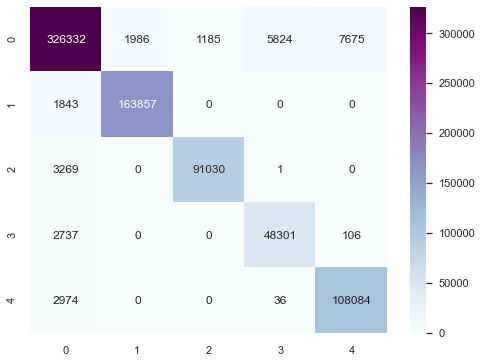

In [51]:
cm = confusion_matrix(y_test, accEdaTemp_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu);

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


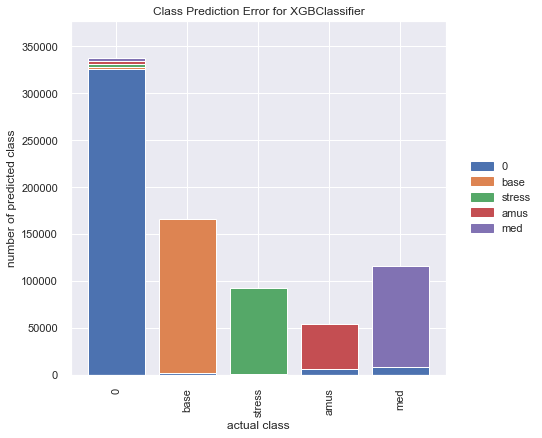

In [52]:
sns.set(style="darkgrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(accEdaTemp, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [53]:
def multiclass_roc_auc_score(y_test, accEdaTemp_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(accEdaTemp_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, accEdaTemp_pred)

print('ACC EDA TEMP')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))

ACC EDA TEMP
-------------------
AUC: 97.72%


In [54]:
Q1 = less_Emg_Ecg.quantile(0.25)
Q3 = less_Emg_Ecg.quantile(0.75)
IQR = Q3 - Q1

In [55]:
less_Emg_Ecg_out = less_Emg_Ecg[~((less_Emg_Ecg < (less_Emg_Ecg - 1.5 * IQR)) |(less_Emg_Ecg > (Q3 + 1.5 * IQR))).any(axis=1)]
print(less_Emg_Ecg_out.shape)

(3272721, 6)


In [56]:
norm_less_Emg_Ecg_out=(less_Emg_Ecg_out-less_Emg_Ecg_out.mean())/less_Emg_Ecg_out.std()
norm_y = less_Emg_Ecg_out.w_label #keep original labels Dont normalize labels
norm_x = norm_less_Emg_Ecg_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [57]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.0
c_eda     0.0
c_temp    0.0
c_ax      0.0
c_ay      0.0
c_az      0.0
dtype: float64

#### KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9040    0.7937    0.8452   1421805
         1.0     0.8922    0.9640    0.9267    823974
         2.0     0.7260    0.9619    0.8275    215177
         3.0     0.7981    0.8687    0.8319    257446
         4.0     0.8886    0.9118    0.9001    554319

    accuracy                         0.8735   3272721
   macro avg     0.8418    0.9000    0.8663   3272721
weighted avg     0.8784    0.8735    0.8728   3272721



#### QDA + Normalization + Cross Validation = 10

In [59]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8975    0.8706    0.8839   1421805
         1.0     0.9779    0.9473    0.9624    823974
         2.0     0.7655    0.7881    0.7767    215177
         3.0     0.8242    0.8931    0.8572    257446
         4.0     0.8898    0.9547    0.9211    554319

    accuracy                         0.9005   3272721
   macro avg     0.8710    0.8908    0.8802   3272721
weighted avg     0.9020    0.9005    0.9008   3272721

